In [2]:
#Import Tensorflow
import tensorflow as tf

In [3]:
#Import the dataset from scikit-learn
from sklearn.datasets import load_breast_cancer

In [4]:
#Load the data
data = load_breast_cancer()

In [5]:
type(data)

sklearn.utils.Bunch

In [6]:
#Since its a bunch, see it's keys
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
#See the data
data['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [8]:
#Data shape
data['data'].shape

(569, 30)

In [9]:
#Target values
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
#Target shape
data['target'].shape

(569,)

In [11]:
#Feature names
data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
#Target Names
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [13]:
#Split the data into train and test sets, 33% of the dataset is test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.data, data.target, test_size=0.33)

N,D = X_train.shape
print(N,D)  #Print the shape of X_train

381 30


In [14]:
# Preprocess the data--> Normalization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
# Building a model

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (D,)),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model with Adam optimizer, binary_crossentropy(2 labels in dataset)  loss function: -y*log y' - (1-y)* log(1 - y')

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [16]:
#Train the model

r = model.fit(X_train,y_train, validation_data = (X_test,y_test), epochs = 100)

print(" Training-set Score: ", model.evaluate(X_train,y_train))
print(" Test-set Score: ", model.evaluate(X_test,y_test))


Epoch 1/100
12/12 [==============================] - 0s 16ms/step - loss: 0.9328 - accuracy: 0.4252 - val_loss: 0.9314 - val_accuracy: 0.4362
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.8538 - accuracy: 0.4803 - val_loss: 0.8412 - val_accuracy: 0.5160
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7799 - accuracy: 0.5328 - val_loss: 0.7631 - val_accuracy: 0.5851
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7164 - accuracy: 0.5801 - val_loss: 0.6953 - val_accuracy: 0.6436
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6613 - accuracy: 0.6247 - val_loss: 0.6371 - val_accuracy: 0.7021
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6128 - accuracy: 0.6667 - val_loss: 0.5880 - val_accuracy: 0.7340
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5719 - accuracy: 0.7087 - val_loss: 0.5445 - val_accuracy: 0.7606
Epoch 8/100


Epoch 59/100
12/12 [==============================] - 0s 4ms/step - loss: 0.1561 - accuracy: 0.9580 - val_loss: 0.1223 - val_accuracy: 0.9628
Epoch 60/100
12/12 [==============================] - 0s 4ms/step - loss: 0.1546 - accuracy: 0.9580 - val_loss: 0.1208 - val_accuracy: 0.9628
Epoch 61/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1532 - accuracy: 0.9580 - val_loss: 0.1194 - val_accuracy: 0.9628
Epoch 62/100
12/12 [==============================] - 0s 4ms/step - loss: 0.1518 - accuracy: 0.9580 - val_loss: 0.1181 - val_accuracy: 0.9681
Epoch 63/100
12/12 [==============================] - 0s 4ms/step - loss: 0.1505 - accuracy: 0.9580 - val_loss: 0.1166 - val_accuracy: 0.9681
Epoch 64/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1491 - accuracy: 0.9580 - val_loss: 0.1154 - val_accuracy: 0.9681
Epoch 65/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1479 - accuracy: 0.9580 - val_loss: 0.1141 - val_accuracy: 0.9681
Epoch 

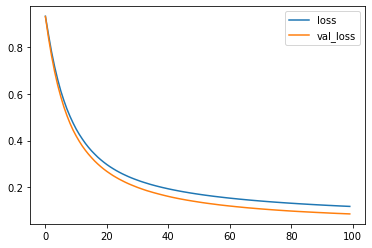

In [17]:
#Plot the Loss, per iteration
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

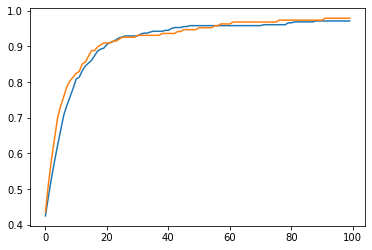

In [18]:
#Plot the Accuracy, per iteration

plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')

# Predictions


In [30]:
P = model.predict(X_test).flatten()

import numpy as np
P = np.round(P)
print(P)
print("Model accuracy: ", model.evaluate(X_test,P)[1] )

[1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1.]
6/6 [==============================] - 0s 1ms/step - loss: 0.0696 - accuracy: 1.0000
Model accuracy:  1.0
